In [53]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('data/annual_deaths_by_clinic.csv')
fig = px.line(df,
              x='year',
              y='deaths',
              color='clinic',
              title="total year birth by clinic")

fig.show()

In [30]:
df[ "pct_deaths"] = df['births']/df["births"].sum() * 100
df["maternal_death_rate"] = (df['deaths']/df['births']) * 100
df

,year,births,deaths,clinic,pct_deaths,maternal_death_rate
0,1841,3036,237,clinic 1,8.024740,7.806324
1,1842,3287,518,clinic 1,8.688182,15.759051
2,1843,3060,274,clinic 1,8.088177,8.954248
3,1844,3157,260,clinic 1,8.344567,8.235667
4,1845,3492,241,clinic 1,9.230037,6.901489
5,1846,4010,459,clinic 1,10.599212,11.446384
6,1841,2442,86,clinic 2,6.454682,3.521704
7,1842,2659,202,clinic 2,7.028256,7.596841
8,1843,2739,164,clinic 2,7.239711,5.987587
9,1844,2956,68,clinic 2,7.813285,2.300406


In [31]:
fig = px.line(df,
              x='year',
              y='pct_deaths',
              color='clinic',
              title="total year birth by clinic")

fig.show()

In [32]:
fig = px.line(df,
              x='year',
              y='maternal_death_rate',
              color='clinic',
              title="total year birth by clinic")

fig.show()

In [7]:
# this data is for the monthly deaths
df_m = pd.read_csv("data/monthly_deaths.csv")
df = df.dropna()

df_m['pct_deaths'] = df_m.deaths/df_m.births

# Drop missing values from df


In [56]:
# lets assume handwashing starts form 1843
handwashing_start = "1847"
before_washing = df_m[df_m.date < handwashing_start]
after_washing = df_m[df_m.date >= handwashing_start]

# Assuming 'pct_deaths' is a column in your DataFrame
bw_rate = before_washing.deaths.sum()/ before_washing.births * 100
aw_rate = after_washing.deaths.sum()/after_washing.births * 100



,date,births,deaths,pct_deaths,washing_hand,before washing,after washing,washing_hand_before,washing_hand_after
0,1841-01-01,254,37,0.145669,yes,no,yes,yes,no
1,1841-02-01,239,18,0.075314,yes,no,yes,yes,no
2,1841-03-01,277,12,0.043321,yes,no,yes,yes,no
3,1841-04-01,255,4,0.015686,yes,no,yes,yes,no
4,1841-05-01,255,2,0.007843,yes,no,yes,yes,no
...,...,...,...,...,...,...,...,...,...
66,1846-08-01,216,39,0.180556,yes,no,yes,yes,no
67,1846-09-01,271,39,0.143911,yes,no,yes,yes,no
68,1846-10-01,254,38,0.149606,yes,no,yes,yes,no
69,1846-11-01,297,32,0.107744,yes,no,yes,yes,no


In [9]:
#calculating the rolling of the months upto 6
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()



In [50]:
df_m['pct_deaths'] = df_m.deaths/df_m.births

before_washing = df_m[df_m.date < handwashing_start]
after_washing = df_m[df_m.date >= handwashing_start]

bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
before_washing['date'] = pd.to_datetime(before_washing['date'])
after_washing['date'] = pd.to_datetime(after_washing['date'])

/var/folders/85/j2cjkqz14rd4bjf14lwb54f40000gn/T/ipykernel_6454/363075134.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/85/j2cjkqz14rd4bjf14lwb54f40000gn/T/ipykernel_6454/363075134.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()
df_m["date"] = pd.to_datetime(df_m["date"])
# years = pd.to_datetime(df_m['date'])
# y_data = years.dt.year

# months = years.dt.month
# months

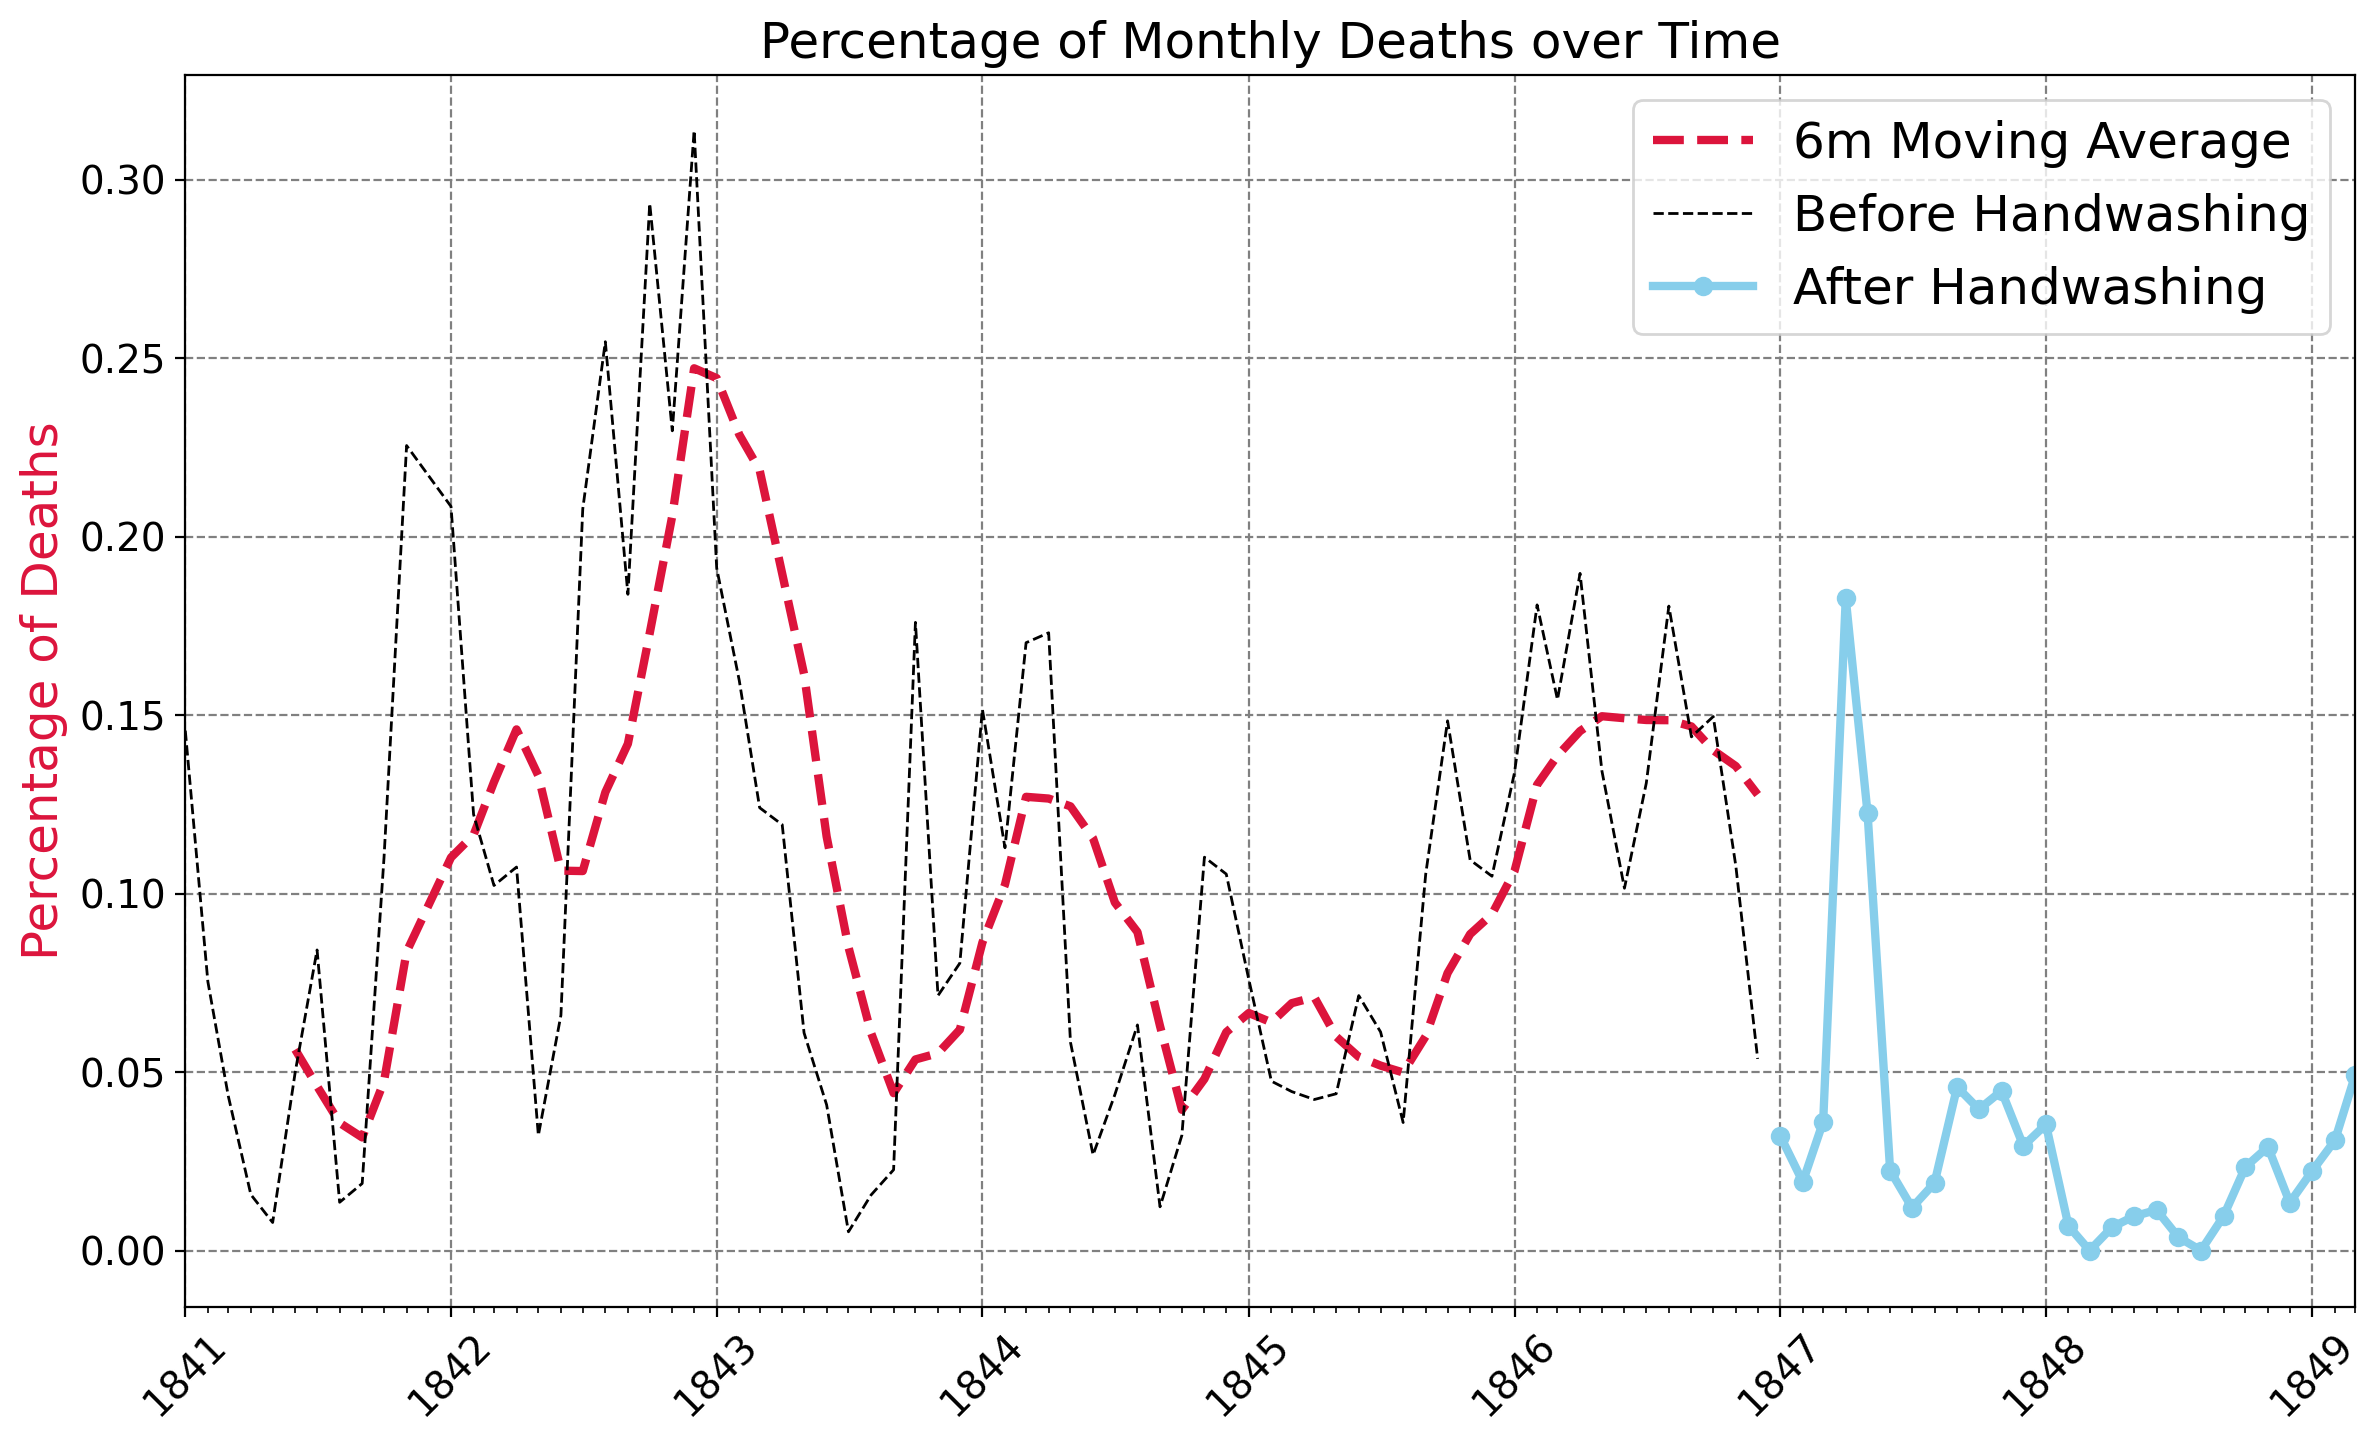

In [12]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_xlim([df_m.date.min(),df_m.date.max()])
plt.grid(color="grey",linestyle="--")

ma_line = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average'),
bw_line = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing'),
aw_line = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')

plt.legend(fontsize=18)

plt.show()

In [20]:
#making the box plot
import numpy as np
df_m["washing_hand"] = np.where(df_m.deaths < int(handwashing_start), "yes", "no")


# Concatenate the two columns to use as x-axis in the box plot


box = px.box(df_m,
       x="washing_hand",
       y="pct_deaths",
       color="washing_hand",
       title="How did state change after washing ands")
box.update_layout(xaxis_title="Washing hands",
           yaxis_title="Percentage of Monthly Deaths")
box.show()

In [49]:
#now making the histogram
color = ['blue',"red",'purple',"black"]
fig = px.histogram(df_m,
                   x="date",
                   y="pct_deaths",
                   title="Number of deaths per year",
                   color_discrete_sequence=color,
                   opacity=0.3,
                   nbins=30,
                   barmode="overlay",
                   histnorm="percent",
                   marginal='box')
fig.update_layout(bargap=0.01)
fig.show()

/var/folders/85/j2cjkqz14rd4bjf14lwb54f40000gn/T/ipykernel_6454/2088517136.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/85/j2cjkqz14rd4bjf14lwb54f40000gn/T/ipykernel_6454/2088517136.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




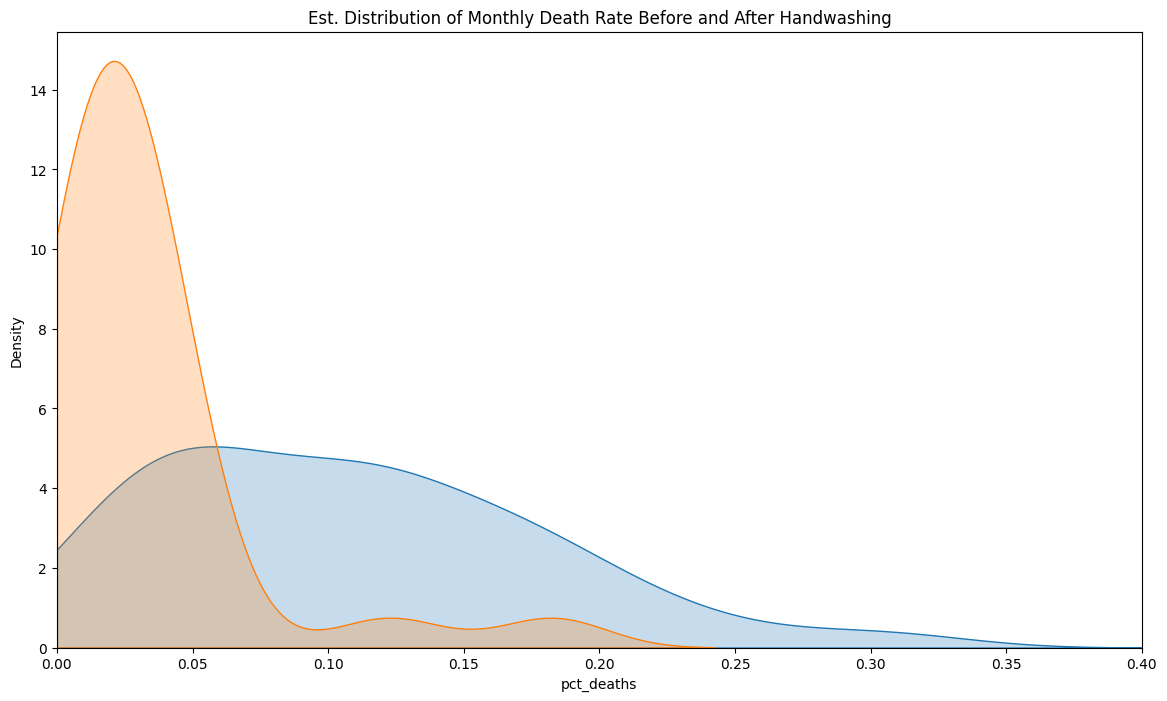

In [66]:
#using the seaborn.kdeplot

plt.figure(figsize=(14,8))
sns.kdeplot(before_washing.pct_deaths,
            shade=True,
            clip=(0,1),
            legend=True)
sns.kdeplot(after_washing.pct_deaths,
            shade=True,
            clip=(0,1),
            legend=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

In [69]:
from scipy import stats

t_test , p_value = stats.ttest_ind(a=before_washing.pct_deaths,
                                   b=after_washing.pct_deaths)
print(t_test)
print(p_value)

5.219468164208576
1.0362134819416883e-06
